In [61]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import threshold_otsu

Reference websites I use for this homework: 

https://www.sciencedirect.com/topics/engineering/global-thresholding

http://appliedmaths.sun.ac.za/TW793/slides/slides_10_4.pdf

https://www.youtube.com/watch?v=f1SaYzOthCM

https://theailearner.com/2019/07/16/global-thresholding/

https://learnopencv.com/otsu-thresholding-with-opencv/

https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-3-otsu-thresholding/

In [62]:
def plot_image3samples(image_1, image_2, image_3, title_1="Original", title_2="Edited",title_3="Edited"):
    # Plotting function on the Mr. Bastanlar's notebooks.
    plt.figure(figsize = (35,35))
    plt.subplot(1, 3, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 3, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.subplot(1, 3, 3)
    plt.imshow(image_3,cmap="gray")
    plt.title(title_3)
    plt.show()

def calculate(x,y):
    # I created the calculation function for simplificate the my code.
    return (np.mean(x)+np.mean(y))/2

def global_thresholding(img):
    # I equalized the initial threshold value to the average of the pixel values.
    avg=np.mean(img)
    Initial_threshold=avg
    Final_threshold=0
    # Iteration part
    while True:
        Temp_threshold=Initial_threshold
        Initial_threshold=calculate(img[img<Temp_threshold],img[img>=Temp_threshold])
        # If I get the same threshold value, I stop the iteration.
        if Initial_threshold==Temp_threshold:
            Final_threshold=Initial_threshold
            break
    print("Basic global thresholding value is:",Final_threshold)
    # I applied the final threshold value to the image.
    img[img < Final_threshold] = 0
    img[img >= Final_threshold] = 1
    
    return img

Otsu's method threshold value is: 124.703125
Basic global thresholding value is: 124.61422332688984


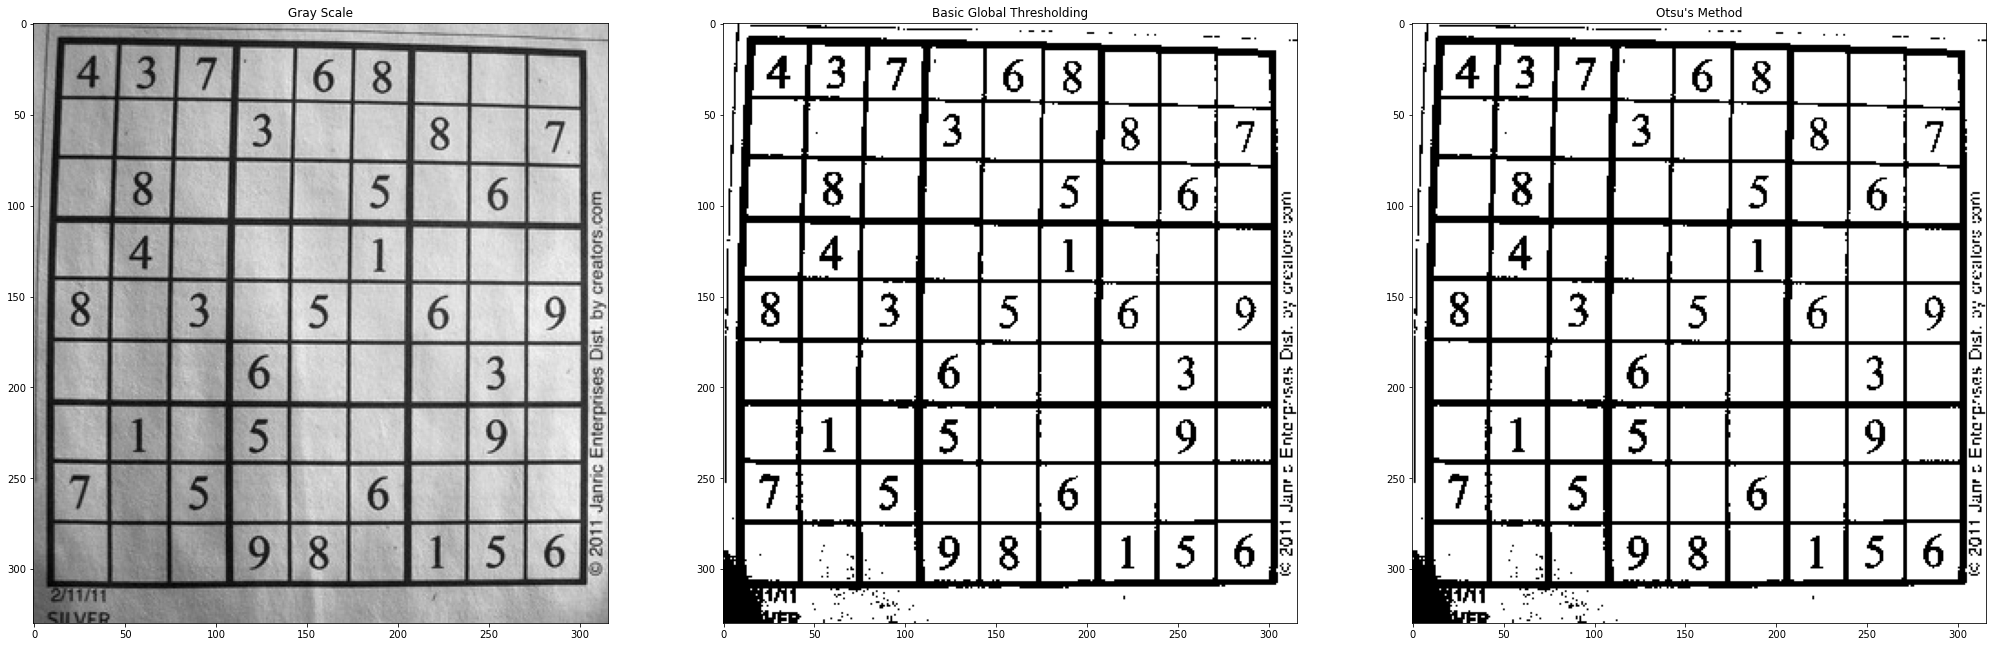

In [63]:
img = io.imread("https://raw.githubusercontent.com/muthuspark/ml_research/master/resources/sudoku4.jpg")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#I had issues the output when I put img_gray directly. So I use img_gray.copy() to make a copy of the image. It solved the problem and why I don't know :D
img_gray_copy = img_gray.copy()

#Otsu's method
threshold_s = (threshold_otsu(img_gray_copy/255))*255
output_with_otsu = img_gray_copy > threshold_s

print("Otsu's method threshold value is:",threshold_s)
# I called the function I created.
output_with_global_thresholding = global_thresholding(img_gray_copy)

# Plotting the results
plot_image3samples(img_gray,output_with_global_thresholding,output_with_otsu,"Gray Scale","Basic Global Thresholding","Otsu's Method")